In [1]:
from pymongo import MongoClient
import urllib.request
from io import BytesIO
from PIL import Image
from gridfs import GridFSBucket

In [2]:
db = MongoClient().python_test
db

Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'python_test')

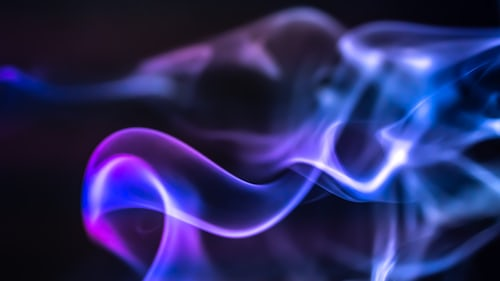

In [3]:
url = "https://images.unsplash.com/photo-1666457383779-8aaf2dea1a3f?ixlib=rb-4.0.3&ixid=MnwxMjA3fDB8MHx0b3BpYy1mZWVkfDEzfHFQWXNEenZKT1ljfHxlbnwwfHx8fA%3D%3D&auto=format&fit=crop&w=500&q=60"
data = urllib.request.urlopen(url).read()
Image.open(BytesIO(data))

In [4]:
# MongoDB로 파일을 업로드할 객체 생성
bucket = GridFSBucket(db)
# p_bucket = bucket
# p_bucket

In [5]:
grid_in = bucket.open_upload_stream('result2.jpg', metadata = {'contentType':'image/jpg'})
grid_in

In [6]:
grid_in.write(data)
grid_in.close()

In [7]:
image_list = list(db.fs.files.find())
image_list

[{'_id': ObjectId('63608c6ae2ba98a6c2c47b07'),
  'filename': 'test.txt',
  'chunkSize': 261120,
  'length': 59,
  'uploadDate': datetime.datetime(2022, 11, 1, 3, 3, 6, 422000)},
 {'_id': ObjectId('63609465f681c4850b215b77'),
  'filename': 'result2.jpg',
  'metadata': {'contentType': 'image/jpg'},
  'chunkSize': 261120,
  'length': 18634,
  'uploadDate': datetime.datetime(2022, 11, 1, 3, 37, 33, 995000)}]

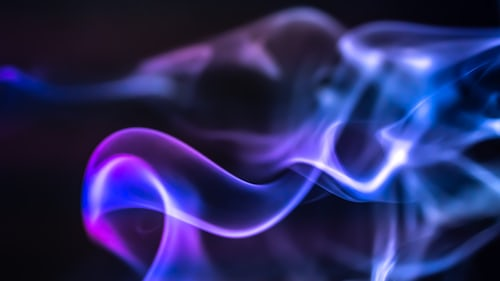

In [8]:
real_img = Image.open(BytesIO(data))
real_img